### **Insall nessaray libraries and packages**

In [ ]:
!pip install utils

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline
import pandas as pd

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

In [ ]:
from keras.utils import to_categorical
from sklearn.utils import shuffle

**Load the dataset**

In [ ]:
TRAIN_DIR_Male = '/content/drive/MyDrive/FER2013_CK+/Male/Train/'
TEST_DIR_Male = '/content/drive/MyDrive/FER2013_CK+/Male/Test/'

# **Preprocess the datasets**

**Read Images from the data path**

In [ ]:
import cv2

In [ ]:
TRAIN_DIR_Male = '/content/drive/MyDrive/FER2013_CK+/Male/Train/'
data_dir_sequence = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad']


img_data_list = []
emotion_counts_tr_male = {}

for dataset in data_dir_sequence:
    img_list = os.listdir(os.path.join(TRAIN_DIR_Male, dataset))
    count = len(img_list)
    emotion_counts_tr_male[dataset] = count
    print('Loaded {} images for the dataset-{}\n'.format(count, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(TRAIN_DIR_Male, dataset, img))
        if input_img is not None:
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img = cv2.equalizeHist(input_img)
            img_data_list.append(input_img)
        else:
            print(f"Failed to read image: {img}")

img_data_train_male = np.array(img_data_list)
img_data_train_male = img_data_train_male.astype('float32')
img_data_train_male = img_data_train_male/ 255

# img_data_train_male = img_data_train_male.reshape(-1, 48, 48)  # Reshape the array to (total_count, 48, 48)

print("Emotion Counts:")
for emotion, count in emotion_counts_tr_male.items():
    print("{}: {}".format(emotion, count))


Loaded 2823 images for the dataset-angry

Loaded 480 images for the dataset-disgust

Loaded 2235 images for the dataset-fear

Loaded 2713 images for the dataset-happy

Loaded 3208 images for the dataset-neutral

Loaded 2643 images for the dataset-sad

Failed to read image: desktop.ini
Emotion Counts:
angry: 2823
disgust: 480
fear: 2235
happy: 2713
neutral: 3208
sad: 2643


In [ ]:
img_data_train_male.shape

(14101, 48, 48)

In [ ]:
TEST_DIR_Male = '/content/drive/MyDrive/FER2013_CK+/Male/Test/'
data_dir_sequence = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad']


img_data_list = []
emotion_counts_te_male = {}

for dataset in data_dir_sequence:
    img_list = os.listdir(os.path.join(TEST_DIR_Male, dataset))
    count = len(img_list)
    emotion_counts_te_male[dataset] = count
    print('Loaded {} images for the dataset-{}\n'.format(count, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(TEST_DIR_Male, dataset, img))
        if input_img is not None:
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img = cv2.equalizeHist(input_img)
            img_data_list.append(input_img)
        else:
            print(f"Failed to read image: {img}")

img_data_test_male = np.array(img_data_list)
img_data_test_male = img_data_test_male.astype('float32')
img_data_test_male = img_data_test_male/ 255

# img_data_test_male = img_data_test_male.reshape(-1, 48, 48)  # Reshape the array to (total_count, 48, 48)

print("Emotion Counts:")
for emotion, count in  emotion_counts_te_male.items():
    print("{}: {}".format(emotion, count))

Loaded 555 images for the dataset-angry

Loaded 75 images for the dataset-disgust

Loaded 451 images for the dataset-fear

Loaded 553 images for the dataset-happy

Loaded 646 images for the dataset-neutral

Loaded 537 images for the dataset-sad

Emotion Counts:
angry: 555
disgust: 75
fear: 451
happy: 553
neutral: 646
sad: 537


In [ ]:
img_data_test_male.shape

(2817, 48, 48)

**Distribution of datasets**

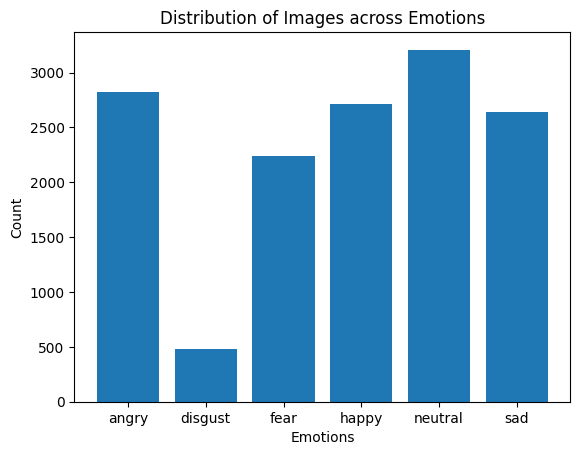

In [ ]:
emotions_tr_ma = list(emotion_counts_tr_male.keys())
counts_tr_ma = list(emotion_counts_tr_male.values())

# Create a bar chart
plt.bar(emotions_tr_ma, counts_tr_ma)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Images across Emotions')
plt.show()

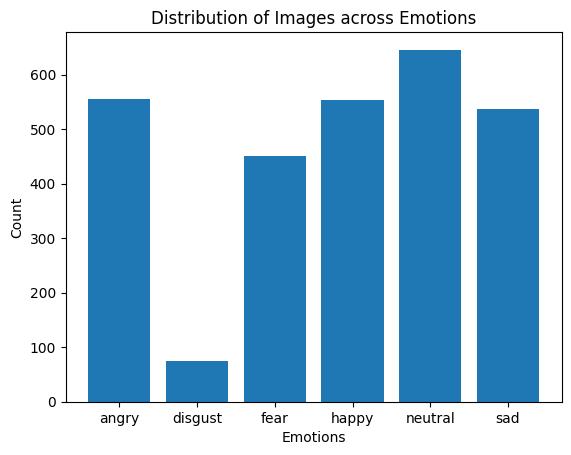

In [ ]:
emotions_ts_me = list(emotion_counts_te_male.keys())
counts_ts_me = list(emotion_counts_te_male.values())

# Create a bar chart
plt.bar(emotions_ts_me, counts_ts_me)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Images across Emotions')
plt.show()

**Define the number of classes**

In [ ]:
from keras.utils import to_categorical

num_classes = 6
num_of_samples_tr_male = img_data_train_male.shape[0]

labels_train_male = np.ones((num_of_samples_tr_male,), dtype='int64')
labels_train_male[0:2823] = 5  # 2823 Angry
labels_train_male[2823:3303] = 4  #  480 Disgust
labels_train_male[3303:5538] = 3  # 2235 Fear
labels_train_male[5538:8251] = 0  # 2713nHappy
labels_train_male[8251:11459] = 2  # 3208  neutral
labels_train_male[11459:] = 1  # 2643 Sad
# labels_train_male[9088:] = 2  # Surprise

names = ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY']

def getLabel(id):
    return ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY'][id]

# labels_train_female_encoded = to_categorical(labels_train_female, num_classes=num_classes)

In [ ]:
labels_train_males = np.bincount(labels_train_male)

# Print the count of each label
for i, count in enumerate(labels_train_males):
    label_name = getLabel(i)
    print("{}: {}".format(label_name, count))

HAPPY: 2713
SAD: 2642
NEUTRAL: 3208
FEAR: 2235
DISGUST: 480
ANGRY: 2823


In [ ]:
from keras.utils import to_categorical

num_classes = 6
num_of_samples_te_male = img_data_test_male.shape[0]

labels_test_male = np.ones((num_of_samples_te_male,), dtype='int64')
labels_test_male[0:555] = 5  # 555 Angry
labels_test_male[555:630] = 4  # 75 Disgust
labels_test_male[630:1081] = 3  # 451 Fear 475
labels_test_male[1081:1634] = 0  # 553 Happy
labels_test_male[1634:2280] = 2  # 646 neutral
labels_test_male[2280:] = 1  # 537 Sad
# labels_test_male[2524:] = 2  642 # Surprise

names = ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY']

def getLabel(id):
    return ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY'][id]

# labels_train_female_encoded = to_categorical(labels_train_female, num_classes=num_classes)


In [ ]:
labels_test_males = np.bincount(labels_test_male)

# Print the count of each label
for i, count in enumerate(labels_test_males):
    label_name = getLabel(i)
    print("{}: {}".format(label_name, count))

HAPPY: 553
SAD: 537
NEUTRAL: 646
FEAR: 451
DISGUST: 75
ANGRY: 555


In [ ]:
print(labels_test_male.shape,labels_train_male.shape)

(2817,) (14101,)


**Convert the class label to one-hot encoding**

In [ ]:
# convert class labels to on-hot encoding# conve
Y_ma_tr = to_categorical(labels_train_male, num_classes)
Y_ma_ts = to_categorical(labels_test_male, num_classes)

In [ ]:
print(Y_ma_tr.shape,Y_ma_ts.shape)

(14101, 6) (2817, 6)


**Shuffle the dataset**

In [ ]:
#Shuffle the dataset
x_train_male,y_train_male = shuffle(img_data_train_male,Y_ma_tr, random_state=2)
x_test_male,y_test_male = shuffle(img_data_test_male,Y_ma_ts, random_state=2)

In [ ]:
X_train_male = x_train_male
Y_train_male = y_train_male
X_test_male = x_test_male
Y_test_male = y_test_male

In [ ]:
print(X_train_male.shape,Y_train_male.shape,X_test_male.shape,Y_test_male.shape)

(14101, 48, 48) (14101, 6) (2817, 48, 48) (2817, 6)


In [ ]:
X_train_male = X_train_male.reshape(X_train_male.shape[0], X_train_male.shape[1], X_train_male.shape[2], 1)
X_test_male =X_test_male.reshape(X_test_male.shape[0], X_test_male.shape[1], X_test_male.shape[2], 1)

# **Handling imbalncing**

**Class weights**

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels_train_male),
    y=labels_train_male
)

class_weights = dict(zip(np.unique(labels_train_male), class_weights))

In [ ]:
class_weights

{0: 0.8662612114510382,
 1: 0.8895407519555892,
 2: 0.7325955943474647,
 3: 1.0515287099179718,
 4: 4.8961805555555555,
 5: 0.8325067894674696}

**Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rotation_range=10)

In [ ]:
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.tensorflow import balanced_batch_generator

class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])

    def __len__(self):
        return self.steps_per_epoch

    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

In [ ]:
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,  # divide each input by its std
                        zca_whitening=False,
                        rotation_range=10,
                        shear_range = 10,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)


balanced_gen_male = data_generator.flow(X_train_male,Y_train_male,)

In [ ]:
# Create an instance of the data generator

# # datagen = ImageDataGenerator(rotation_range=10,)
# balanced_gen_male = BalancedDataGenerator(X_train_male,Y_train_male, datagen, batch_size=32)
# # balanced_gen_val_male = BalancedDataGenerator(X_test_male, Y_test_male, datagen, batch_size=32)

**Learning Rate Scheduler**

In [ ]:
class LossLearningRateScheduler(tf.keras.callbacks.History):
    """
    A learning rate scheduler that relies on changes in loss function
    value to dictate whether learning rate is decayed or not.
    LossLearningRateScheduler has the following properties:
    base_lr: the starting learning rate
    lookback_epochs: the number of epochs in the past to compare with the loss function at the current epoch to determine if progress is being made.
    decay_threshold / decay_multiple: if loss function has not improved by a factor of decay_threshold * lookback_epochs, then decay_multiple will be applied to the learning rate.
    spike_epochs: list of the epoch numbers where you want to spike the learning rate.
    spike_multiple: the multiple applied to the current learning rate for a spike.
    """

    def __init__(self, base_lr, lookback_epochs, spike_epochs = None, spike_multiple = 10, decay_threshold = 0.002, decay_multiple = 0.7, loss_type = 'val_loss'):

        super(LossLearningRateScheduler, self).__init__()

        self.base_lr = base_lr
        self.lookback_epochs = lookback_epochs
        self.spike_epochs = spike_epochs
        self.spike_multiple = spike_multiple
        self.decay_threshold = decay_threshold
        self.decay_multiple = decay_multiple
        self.loss_type = loss_type


    def on_epoch_begin(self, epoch, logs=None):

        if len(self.epoch) > self.lookback_epochs:

            current_lr = tf.keras.backend.get_value(self.model.optimizer.lr)

            target_loss = self.history[self.loss_type]

            loss_diff =  target_loss[-int(self.lookback_epochs)] - target_loss[-1]

            if loss_diff <= np.abs(target_loss[-1]) * (self.decay_threshold * self.lookback_epochs):

                print(' '.join(('Changing learning rate from', str(current_lr), 'to', str(current_lr * self.decay_multiple))))
                tf.keras.backend.set_value(self.model.optimizer.lr, current_lr * self.decay_multiple)
                current_lr = current_lr * self.decay_multiple

            else:

                print(' '.join(('Learning rate:', str(current_lr))))

            if self.spike_epochs is not None and len(self.epoch) in self.spike_epochs:
                print(' '.join(('Spiking learning rate from', str(current_lr), 'to', str(current_lr * self.spike_multiple))))
                tf.keras.backend.set_value(self.model.optimizer.lr, current_lr * self.spike_multiple)

        else:

            print(' '.join(('Setting learning rate to', str(self.base_lr))))
            tf.keras.backend.set_value(self.model.optimizer.lr, self.base_lr)


        return tf.keras.backend.get_value(self.model.optimizer.lr)



In [ ]:
callback_lr = LossLearningRateScheduler(base_lr=0.001, lookback_epochs=5)

In [ ]:
filepath = '/content/drive/MyDrive/Reserch/best_model_cifar10_male.hdf5'
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping


checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

stop = EarlyStopping(monitor='val_accuracy', patience =5,
                      verbose=0, mode='auto', baseline=None,
                      restore_best_weights=False)

callbacks = [checkpoint,stop,callback_lr]

In [ ]:
from keras import layers


# **Model Buliding**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization
from keras.regularizers import l2  # Import l2 function

In [ ]:
img_size = 48

In [ ]:

    num_classes = 6
    model = Sequential()
    #the 1-st block
    model.add(Conv2D(64,(3,3),padding='same',input_shape =(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(5,5),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256,))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    model.add(Dense(512,))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes,activation='softmax'))



    print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# **Train the model**

In [ ]:
batch = 32
epoch = 50
optimizer = Adam(beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(balanced_gen_male, batch_size=batch, epochs=epoch, class_weight=class_weights, validation_data=(X_test_male,Y_test_male),callbacks=callbacks)

Setting learning rate to 0.001
Epoch 1/50
439/441 [============================>.] - ETA: 0s - loss: 1.9877 - accuracy: 0.1948
Epoch 1: val_accuracy improved from -inf to 0.24210, saving model to /content/drive/MyDrive/Reserch/best_model_cifar10_male.hdf5
441/441 [==============================] - 31s 36ms/step - loss: 1.9862 - accuracy: 0.1952 - val_loss: 1.7099 - val_accuracy: 0.2421
Setting learning rate to 0.001
Epoch 2/50
439/441 [============================>.] - ETA: 0s - loss: 1.7938 - accuracy: 0.2407
Epoch 2: val_accuracy improved from 0.24210 to 0.30032, saving model to /content/drive/MyDrive/Reserch/best_model_cifar10_male.hdf5
441/441 [==============================] - 14s 32ms/step - loss: 1.7934 - accuracy: 0.2411 - val_loss: 1.6340 - val_accuracy: 0.3003
Setting learning rate to 0.001
Epoch 3/50
441/441 [==============================] - ETA: 0s - loss: 1.7220 - accuracy: 0.2774
Epoch 3: val_accuracy did not improve from 0.30032
441/441 [==============================] 

In [ ]:
loss, accuracy = model.evaluate(X_test_male,Y_test_male)

89/89 [==============================] - 1s 7ms/step - loss: 1.0053 - accuracy: 0.6131


**Prediction results**

In [ ]:
# Assuming you have a trained model named 'model' and training data X_train and corresponding labels Y_train

# Define the emotion label mapping
label_mapping = {
    0: "happy",
    1: "sad",
    2: "neutral",
    3: "fear",
    4: "disgust",
    5: "angry"
}

# Make predictions on the training data
Y_pred = model.predict(X_train_male)

# Select a few examples to display
num_examples = 10
indices = np.random.randint(0, len(X_train_male), num_examples)

# Display the predicted and actual labels for the selected examples
for index in indices:
    predicted_label = np.argmax(Y_pred[index])  # Get the index of the predicted class with the highest probability
    actual_label = np.argmax(Y_train_male[index])  # Get the index of the actual class
    predicted_emotion = label_mapping[predicted_label]
    actual_emotion = label_mapping[actual_label]
    print("Example {}: Predicted label = {}, Actual label = {}".format(index, predicted_emotion, actual_emotion))


441/441 [==============================] - 3s 6ms/step
Example 1750: Predicted label = angry, Actual label = sad
Example 5997: Predicted label = happy, Actual label = happy
Example 11288: Predicted label = neutral, Actual label = angry
Example 5032: Predicted label = angry, Actual label = angry
Example 4029: Predicted label = happy, Actual label = happy
Example 6165: Predicted label = neutral, Actual label = neutral
Example 13694: Predicted label = neutral, Actual label = neutral
Example 537: Predicted label = neutral, Actual label = neutral
Example 2301: Predicted label = sad, Actual label = fear
Example 11182: Predicted label = fear, Actual label = fear


In [ ]:
def plotting_epochs(training_, validation_, lossOrAccu):
  plt.figure(figsize=[6,4])
  plt.plot(training_, 'black', linewidth=2.0)
  plt.plot(validation_, 'blue', linewidth=2.0)
  plt.legend(['Training '+lossOrAccu, 'Validation '+lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

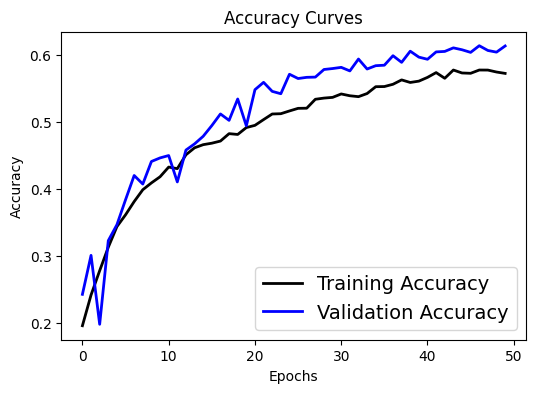

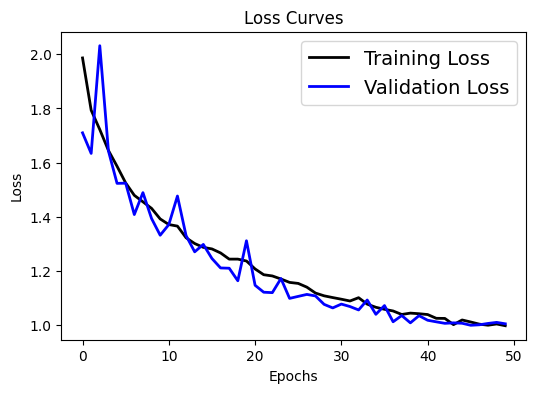

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], "Accuracy")
plotting_epochs(history.history['loss'], history.history['val_loss'], "Loss")

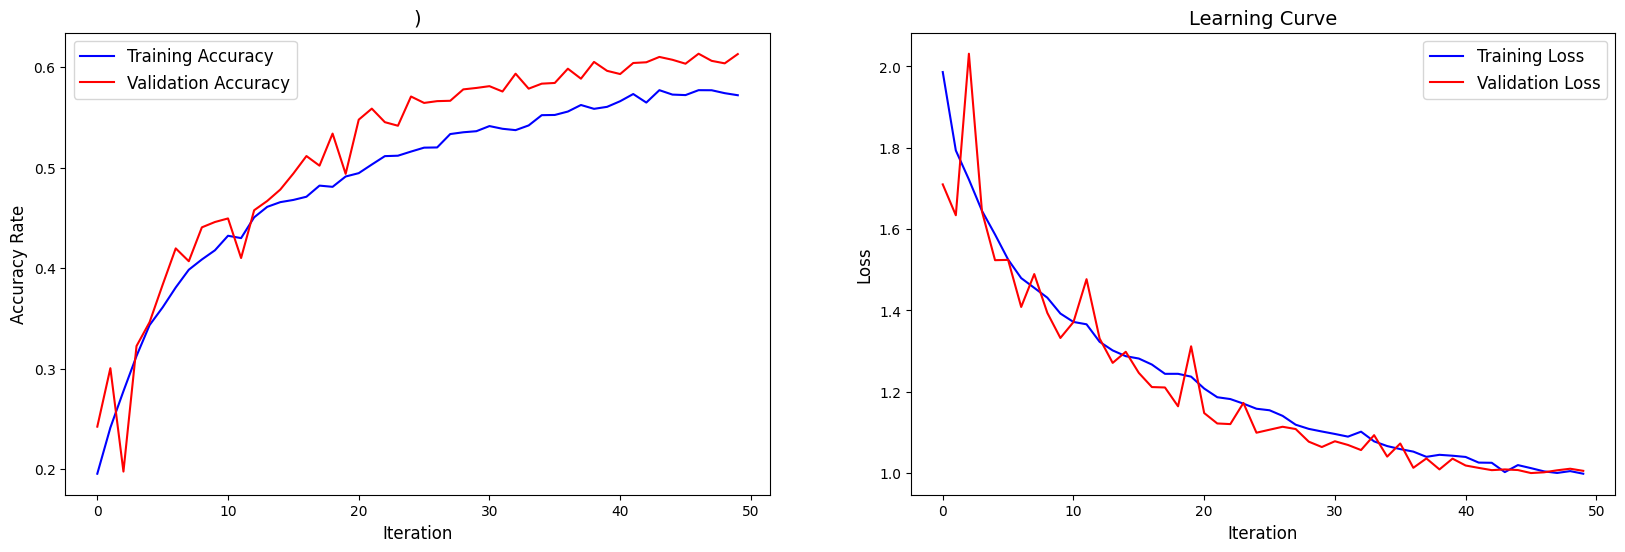

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history.history['accuracy'],'b', history.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title(')',fontsize=14)

ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history.history['loss'], 'b',history.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

89/89 [==============================] - 1s 6ms/step


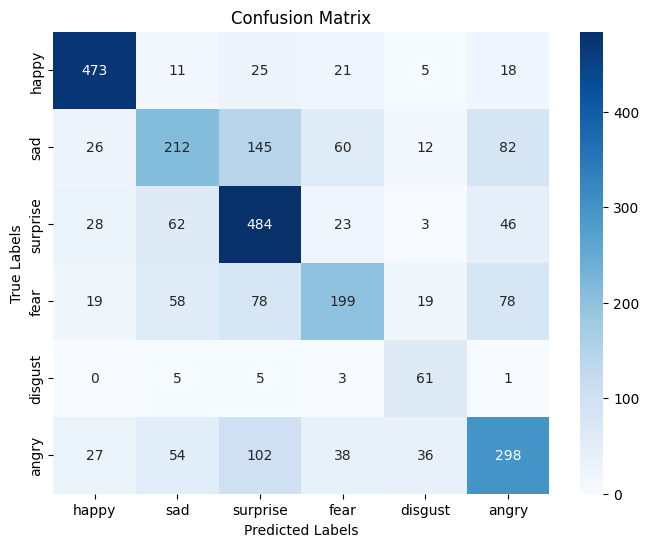

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a trained model named 'model' and test data X_test with corresponding true labels Y_test

# Make predictions on the test data
Y_pred = model.predict(X_test_male)

# Get the class labels with the highest probability for each prediction
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels for the test data
y_true = np.argmax(Y_test_male, axis=1)

# Assuming you have the true labels (y_true) and predicted labels (y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a list of class labels
class_labels = ['happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:

from sklearn.metrics import classification_report

# Assuming you have a trained model named 'model' and test data X_test and corresponding labels Y_test

# Make predictions on the test data
Y_pred = model.predict(X_test_male)
predicted_labels = np.argmax(Y_pred, axis=1)

# Generate classification report
report = classification_report(np.argmax(Y_test_male, axis=1), predicted_labels)

print(report)

89/89 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       553
           1       0.53      0.39      0.45       537
           2       0.58      0.75      0.65       646
           3       0.58      0.44      0.50       451
           4       0.45      0.81      0.58        75
           5       0.57      0.54      0.55       555

    accuracy                           0.61      2817
   macro avg       0.59      0.63      0.60      2817
weighted avg       0.61      0.61      0.60      2817



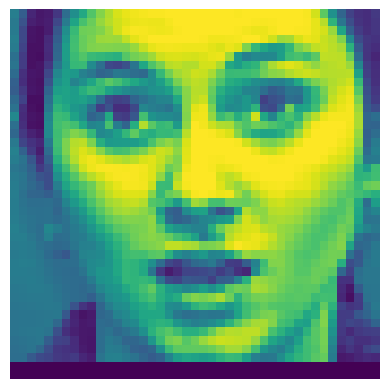

In [ ]:
import dlib
from PIL import Image
from skimage import io, color
import matplotlib.pyplot as plt

def detect_faces(image):
    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Convert image to RGB if it's in a different format
    if image.ndim == 2:
        # Grayscale image
        image = color.gray2rgb(image)
    elif image.ndim == 4:
        # RGBA image
        image = image[..., :3]

    # Run detector and get bounding boxes of the faces in the image
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(), x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
img_path = '/content/drive/MyDrive/photos/S057_001_00000019.png'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)
tab_faces = []
# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    tab = np.asarray(face)
    tab_faces.append(tab)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

plt.show()


In [ ]:
image_to_predict = np.asarray(face)
img = cv2.resize(image_to_predict,(48,48),1)

In [ ]:
inv_dic = {
    0: 'happy',
    1: 'sad',
    2: 'suprise',
    3: 'fear',
    4: 'disgust',
    5: 'angry'
    # Add more class labels and indices as needed
}


In [ ]:
tab = []
tab.append(img)
tab = np.array(tab)
print(inv_dic[np.argmax(model.predict(tab))])
# plt.imshow(tab[0],cmap = plt.cm.binary)

1/1 [==============================] - 0s 160ms/step
suprise


In [ ]:
for img in tab_faces :
  img = img = cv2.resize(img,(48,48),3)
  tab = []
  tab.append(img)
  tab = np.array(tab)
  print(inv_dic[np.argmax(model.predict(tab))])

1/1 [==============================] - 0s 21ms/step
suprise


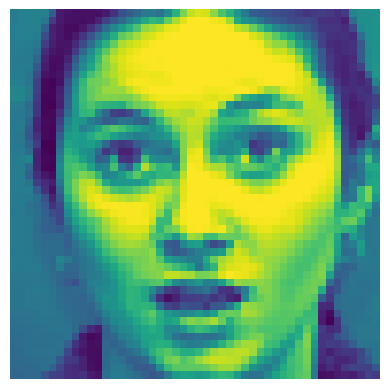

In [ ]:
# Load and display the original image
original_image = Image.fromarray(image)
plt.figure()
plt.imshow(original_image)
plt.axis('off')
plt.show()

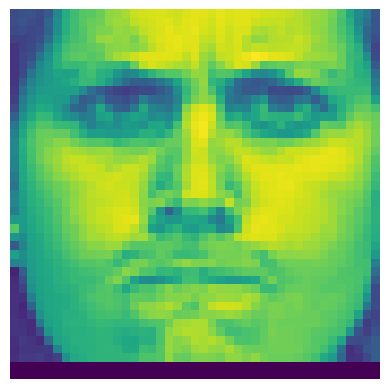

In [ ]:
import dlib
from PIL import Image
from skimage import io, color
import matplotlib.pyplot as plt

def detect_faces(image):
    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Convert image to RGB if it's in a different format
    if image.ndim == 2:
        # Grayscale image
        image = color.gray2rgb(image)
    elif image.ndim == 4:
        # RGBA image
        image = image[..., :3]

    # Run detector and get bounding boxes of the faces in the image
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(), x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
img_path = '/content/drive/MyDrive/photos/S999_001_00000018.png'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)
tab_faces = []
# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    tab = np.asarray(face)
    tab_faces.append(tab)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

plt.show()

In [ ]:
image_to_predict = np.asarray(face)
img = cv2.resize(image_to_predict,(48,48),1)

In [ ]:
inv_dic = {
    0: 'happy',
    1: 'sad',
    2: 'suprise',
    3: 'fear',
    4: 'disgust',
    5: 'angry'
    # Add more class labels and indices as needed
}


In [ ]:
tab = []
tab.append(img)
tab = np.array(tab)
print(inv_dic[np.argmax(model.predict(tab))])
# plt.imshow(tab[0],cmap = plt.cm.binary)

1/1 [==============================] - 0s 24ms/step
suprise


In [ ]:
# for img in tab_faces :
#   img = img = cv2.resize(img,(48,48),3)
#   tab = []
#   tab.append(img)
#   tab = np.array(tab)
#   print(inv_dic[np.argmax(model.predict(tab))])

In [ ]:
# # Load and display the original image
# original_image = Image.fromarray(image)
# plt.figure()
# plt.imshow(original_image)
# plt.axis('off')
# plt.show()